## Polynomial Regression
Author : sreejith s

Date   : Fri Sep 04 2020


### Form of the hypothesis: 
$h_\theta(x) = \theta_0 + \theta_1x + \theta_1x^2 + \dots + \theta_nx^n$  

$\begin{align}
if \ X &= \begin{bmatrix}
           x^{0} \\
           x^{1} \\
           \vdots \\
           x^{n}
     \end{bmatrix}
\end{align}$

\\

$\begin{align}
and \ \theta &= \begin{bmatrix}
           \theta_{0} \\
           \theta_{1} \\
           \vdots \\
           \theta_{n}
         \end{bmatrix}
\end{align}
$

\\

$h_{\theta}(x) = \theta^{T}X$


## Creating pandas dataframe

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

     SAT   GPA
0   1714  2.40
1   1664  2.52
2   1760  2.54
3   1685  2.74
4   1693  2.83
..   ...   ...
79  1936  3.71
80  1810  3.71
81  1987  3.73
82  1962  3.76
83  2050  3.81

[84 rows x 2 columns]


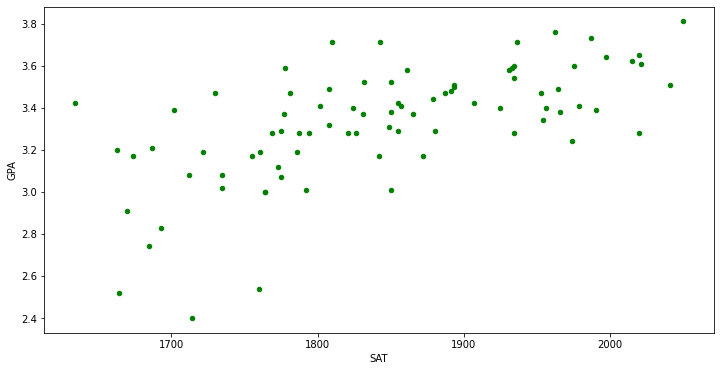

In [11]:
#Creating dataframe from csv file and inspecting data
df_sat = pd.read_csv('/content/sat-gpa-dataset.csv')
print(df_sat)
df_sat.plot.scatter(x='SAT', y='GPA', color='green', figsize=(12, 6))
plt.show()

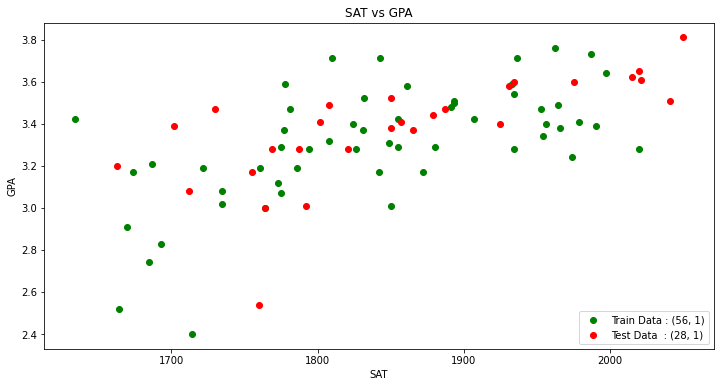

In [12]:
# Split train and test data
from sklearn.model_selection import train_test_split

#Extracting series from pandas dataframe x <- df_sat['SAT'], y <- df_sat['GPA']
#and reshaping to a 2D numpy.ndarray
X = df_sat['SAT'].values.reshape(-1, 1)
y = df_sat['GPA'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=2/3,
                                                     random_state=0)
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='green')
plt.scatter(X_test, y_test, color='red')
plt.legend([f'Train Data : {X_train.shape}', 
            f'Test Data  : {X_test.shape}'],
            loc="lower right")
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.title('SAT vs GPA')
plt.show()

## Linear Regression

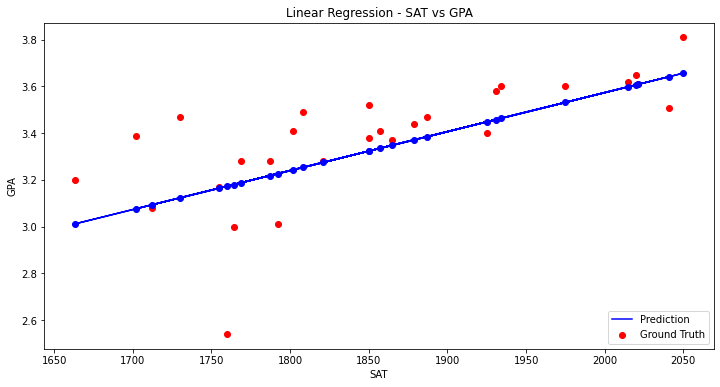

MSE= 0.034788883960298854 	MAE= 0.13167984620982928


In [13]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
plt.figure(figsize=(12, 6))
#plt.scatter(x_train, y_train, color='green')
plt.scatter(X_test, y_test, color='red')
plt.scatter(X_test, y_pred, color='blue')
#plt.scatter(x_train, y_train, color='green')
plt.plot(X_test, y_pred, color='blue')
plt.legend(['Prediction', 'Ground Truth'], loc="lower right")
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.title('Linear Regression - SAT vs GPA')
plt.show()
print("MSE=", mean_squared_error(y_test, y_pred) ,"\tMAE=", mean_absolute_error(y_test, y_pred))

## Polynomial Regression

Using ```PolynomialFeatures``` 

> Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form ```[a, b]```, the degree-2 polynomial features are ```[1, a, b, a^2, ab, b^2]``` [doc](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures)


In our case input is 1D, ```[SAT]```, the output will be ```[1, SAT^1, SAT^2]``` for a degree of 2. 


Using ```fit_transform()``` [link](https://datascience.stackexchange.com/questions/12321/whats-the-difference-between-fit-and-fit-transform-in-scikit-learn-models)


In [16]:
from sklearn.preprocessing import PolynomialFeatures

def poly_reg(degrees=4):
  """
  Plynomial Regression
  Args: degrees - the polynomial's degree
  Returns: MSE_test, MAE_test, MSE_train, MAE_train
  """
  polynomial_features = PolynomialFeatures(degree=degrees)
  X_poly_train = polynomial_features.fit_transform(X_train)
  X_poly_test = polynomial_features.fit_transform(X_test)
  model_poly = LinearRegression()
  model_poly.fit(X_poly_train, y_train)
  y_poly_pred = model_poly.predict(X_poly_test)
  y_poly_pred_on_train = model_poly.predict(X_poly_train) #for checking fit on train data
  plt.figure(figsize=(12, 6))
  plt.scatter(X_train, y_train, color='green')
  plt.scatter(X_test, y_test, color='red')
  plt.scatter(X_test, y_poly_pred, color='blue')
  x_s, y_s = zip(*sorted(zip(X_test, y_poly_pred)))
  plt.plot(x_s, y_s, color='black')
  plt.title(f'Polynomial Regression [n={degrees}] - SAT vs GPA')
  plt.legend(['Prediction', 'Train Set', 'Ground Truth'], loc="lower right")
  plt.xlabel('SAT')
  plt.ylabel('GPA')
  return (mean_squared_error(y_test, y_poly_pred) ,
          mean_absolute_error(y_test, y_poly_pred),
          mean_squared_error(y_train, y_poly_pred_on_train),
          mean_absolute_error(y_train, y_poly_pred_on_train)          )

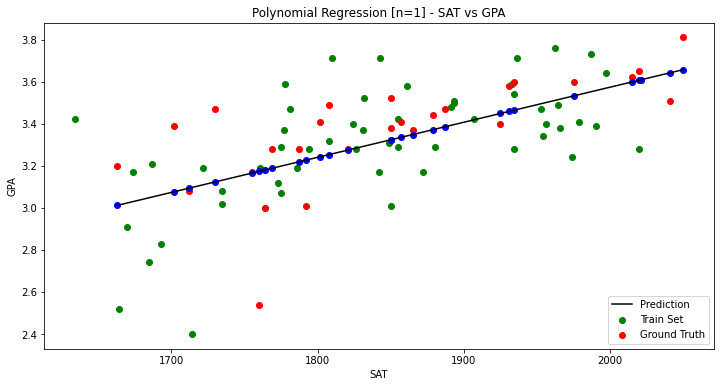

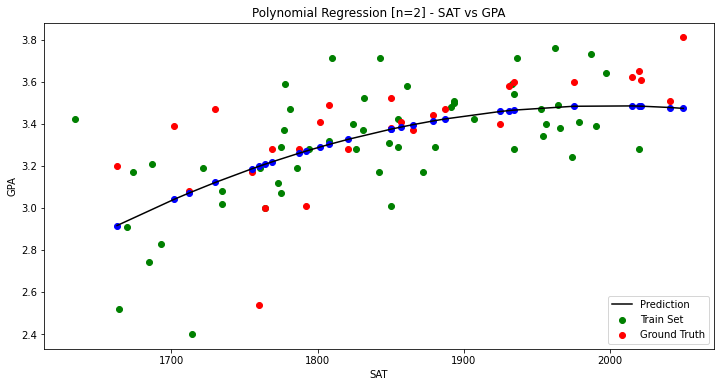

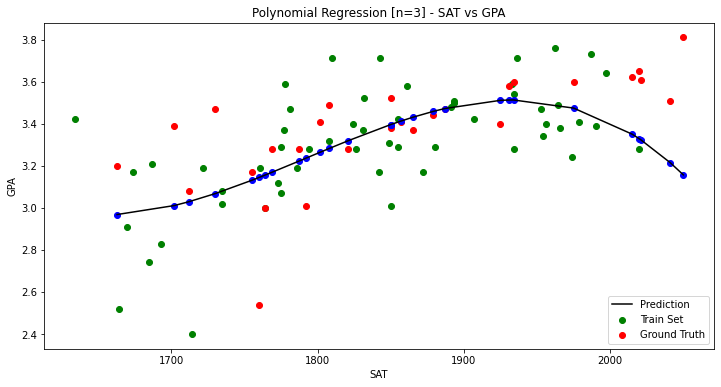

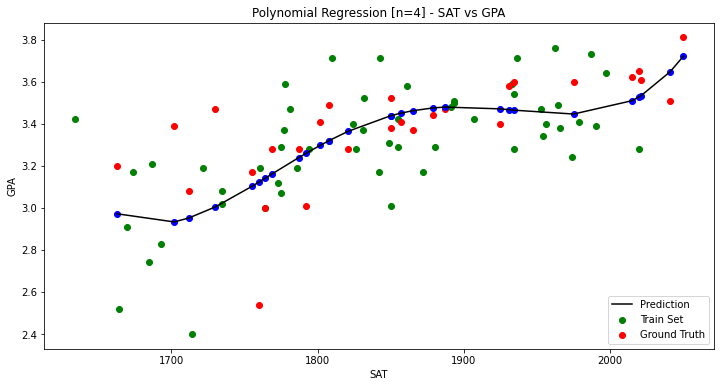

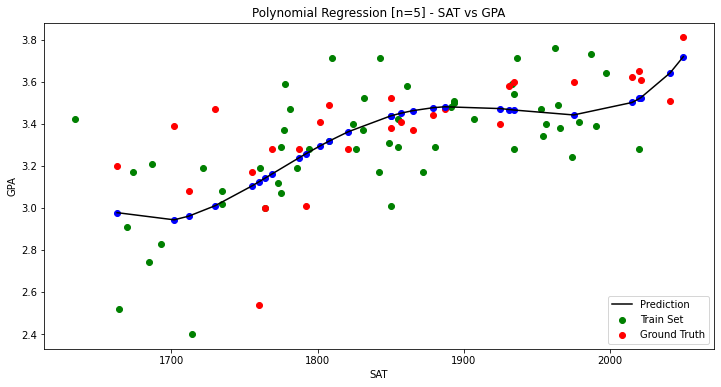

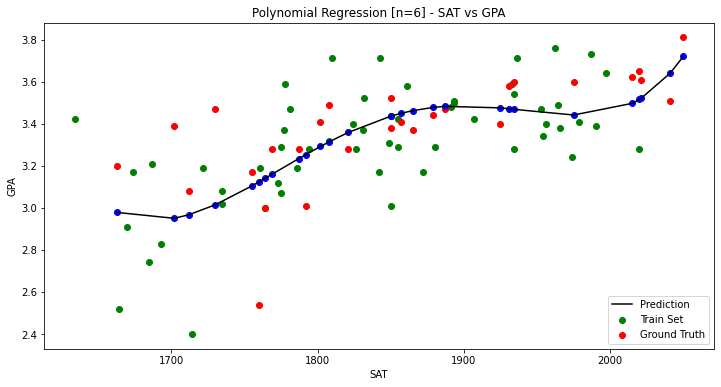

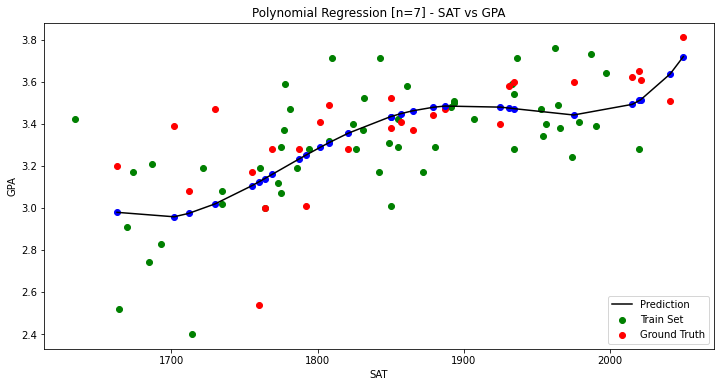

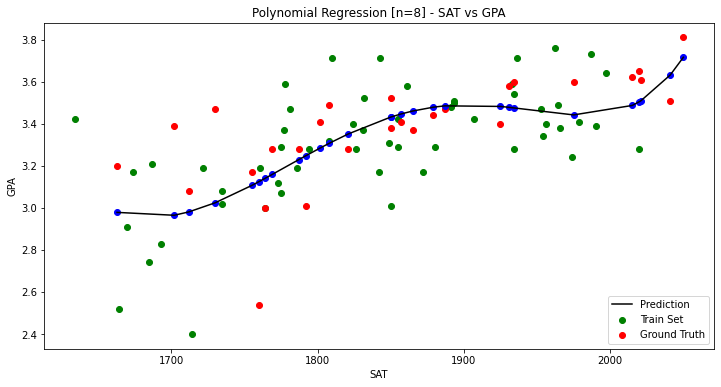

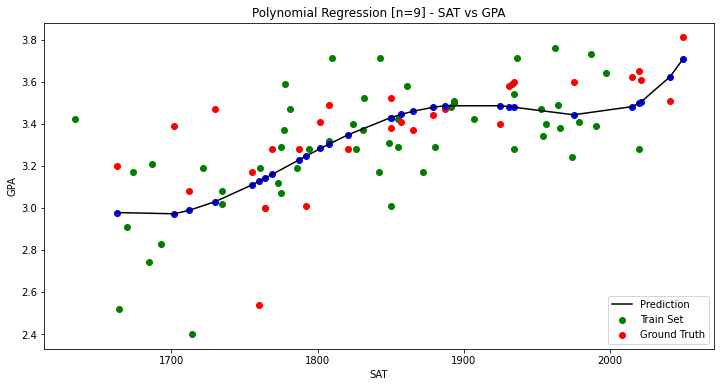

In [19]:
errors_mse = []
errors_mae = []
errors_mse_train = []
errors_mae_train = []
for i in range(1, 10):
  mse, mae, mse_train, mae_train = poly_reg(i)
  errors_mse.append(mse)
  errors_mae.append(mae)
  errors_mse_train.append(mse_train)
  errors_mae_train.append(mae_train)
plt.show()

## Evaluate performance - Mean Square Error(MSE) & Mean Absolute Error(MAE)

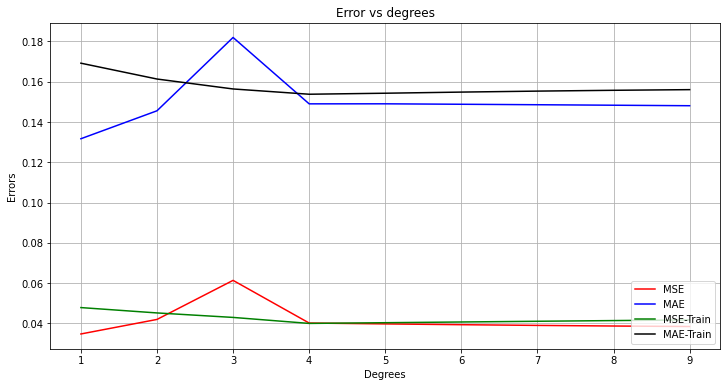

In [20]:
plt.figure(figsize=(12, 6))
plt.title('Error vs degrees')
x_ax = list(range(1, 10))
plt.plot(x_ax, errors_mse, color='red')
plt.plot(x_ax, errors_mae, color='blue')
plt.plot(x_ax, errors_mse_train, color='green')
plt.plot(x_ax, errors_mae_train, color='black')
plt.legend(['MSE', 'MAE', 'MSE-Train', 'MAE-Train'], loc="lower right")
plt.xlabel('Degrees')
plt.ylabel('Errors')
plt.grid(True)
plt.show()

In [ ]:
print(f'min(MSE) = {min(errors_mse)}\t max(MSE) = {max(errors_mse)}')
print(f'min(MAE) = {min(errors_mae)}\t max(MAE) = {max(errors_mae)}')

### Inference



#### 3.1 & 3.2

It can be observed that the best fit happens when the ```degree=1```, that means simple linear regression model is the best prediction model. 
The reason for this is that the dataset is almost linear, ignoring a few outliers. 

When we increase the degree of the polynomial, starting from ```degree=1```, the performance decreases until ```degree=3```. This is due to the inability of the 2nd and 3rd degree polynomials to correctly model the training set. They deviate, esp. at the extremities. This will give rise to a higher error due to underfitting. The 2nd and 3rd degree polynomial regression models have high bias.

After the 3rd degree, slight improvement can be noticed with increase in degree, but due to overfitting, the performance doesn't reach the same as the linear regression model ```(degree=1)```.

There is no significant improvement with an increase in degree after ```degree=4```, even though the bias is low. Observing the error on training data it can be seen that overfitting (if any) reduces slightly as the degree reaches 9.


|Plot   |Degrees  |MSE   |MAE   |Fit   |
|---|---|---|---|---|
|![img1.png](https://drive.google.com/uc?export=view&id=1z66Sxn-tvJwaS1o-O9Un0SlkyBckTK4P)|1   |0.03478888396029888   |0.13167984620982945  |Right   |
|![img2.png](https://drive.google.com/uc?export=view&id=1t3BzQQGFCdCGdWioz1FMBGrz2qsQTWHg)|2   |0.04200549099230636   |0.14555129611245324  |Underfit   |
|![img3.png](https://drive.google.com/uc?export=view&id=1ntpAP_GtxXzubn-WkMB8AUogjFVzO3lS)|3   |0.06139166208863593   |0.1819416447531838   |Underfit   |
|![img4.png](https://drive.google.com/uc?export=view&id=12guF1JZv3ZfUaWrs6oMRoiHOdpRN4tLZ)|4   |0.040216660323488564  |0.14899692701913933  |Overfit   |
|![img5.png](https://drive.google.com/uc?export=view&id=1N-TJo759FyJffN2Wso1BtTDMiaQEyHDT)|5   |0.03978286837555052   |0.14901176555558132  |Overfit   |
|![img6.png](https://drive.google.com/uc?export=view&id=15yc1LqOn35zfUwfWKRSUF-hSaiRmyLWV)|6   |0.03939227268900773   |0.14879246129367113  |Overfit   |
|![img7.png](https://drive.google.com/uc?export=view&id=1-zxkp2iTz1e9Be3Xv_ehHA1EcYk3Fpmd)|7   |0.039040873980336996  |0.1485585024807356   |Overfit   |
|![img8.png](https://drive.google.com/uc?export=view&id=12akOy-BcpY0dvqxPRcTLCNfqn0K6htMb)|8   |0.03873835503035746   |0.1483144110467929   |Overfit   |
|![img9.png](https://drive.google.com/uc?export=view&id=1LQKYJoK3ZG1o35XtG7LUxlvoiuGSdAKc)|9   |0.038495352783040934  |0.14806807557467389  |Overfit   |









